# Hackathon : Preise the Box Project

In [1]:
import sys, os
sys.path.append("../../..")

import gempy as gp

import gempy.addons.sandbox as sb 
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Kinect initialization

In [2]:
kinect=sb.Kinect(dummy=False)


looking for kinect...
0
kinect initialized


In [3]:
beamer=sb.Beamer()
beamer.resolution=(1920,1080)
beamer.start_stream()
calibration=beamer.calibration
#calibration.create()


calibration not provided or invalid. a new calibration was created.


In [4]:
calibration.load(calibration_file="sandbox_hackathon.dat")

### Project geological model

In [ ]:
geo_data = gp.create_data([0,2000,0,2000,0,2000],[30,30,30], 
                          path_o = os.pardir+"/../input_data/tut_chapter1/simple_fault_model_orientations.csv", # importing orientation (foliation) data
                          path_i = os.pardir+"/../input_data/tut_chapter1/simple_fault_model_points.csv") # importing point-positional interface data

gp.set_series(geo_data, {"Fault_Series":'Main_Fault', 
                         "Strat_Series": ('Sandstone_2','Siltstone',
                                          'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault', 
                                         'Sandstone_2','Siltstone',
                                         'Shale', 'Sandstone_1',
                                         ], verbose=0) 

interp_data = gp.InterpolatorData(geo_data, 
                                  output='geology', compile_theano=True,
                                  theano_optimizer='fast_compile',
                                  verbose=[])

In [6]:
calibration.kinect = kinect

In [9]:
import threading
    
lock = threading.Lock()
model=sb.Model(interp_data, lock=lock,
               associated_calibration=calibration)
model.calculate_scales()
model.create_empty_depth_grid()
t = threading.Thread(target=sb.run_model, args=(model, 
                                                calibration,
                                                kinect), daemon=None)


Aspect ratio of the model is fixed in XY
Model size is limited by Y dimension
scale in Model units/ mm (X,Y,Z): [12.345679012345679, 12.345679012345679, 5.0]


In [ ]:
calibration.kinect.ge

In [10]:
t.start()

In [12]:
t.isAlive()

False

In [19]:
model.stop_threat=True

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "../../../gempy/addons/sandbox.py", line 585, in run_model
    raise Exception('Threat stopped')
Exception: Threat stopped



### Extract depth

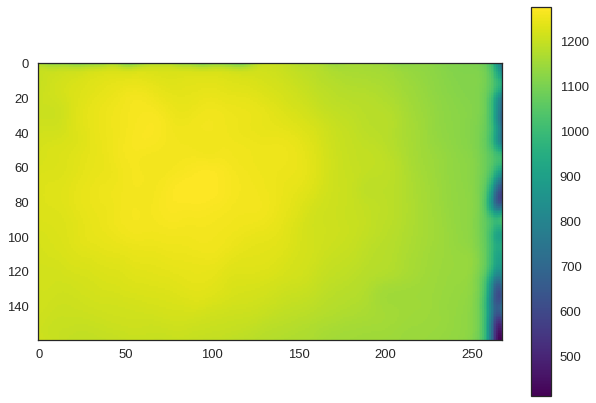

In [37]:
import matplotlib.pyplot as plt
plt.imshow(kinect.depth[50:210, 110:378], cmap='viridis')
plt.colorbar()

### Extract Image

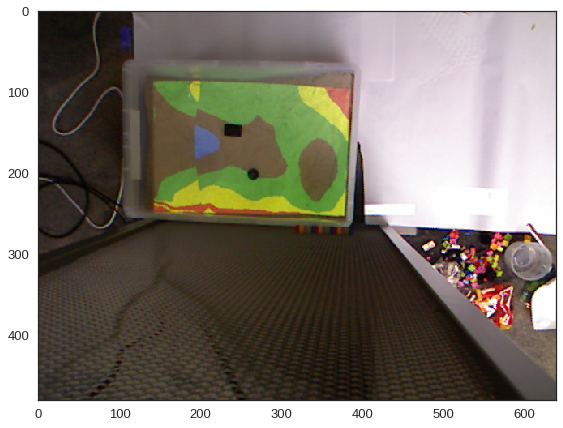

In [11]:
photo = kinect.get_rgb_frame()
plt.imshow(photo)

using last calibration instance created.


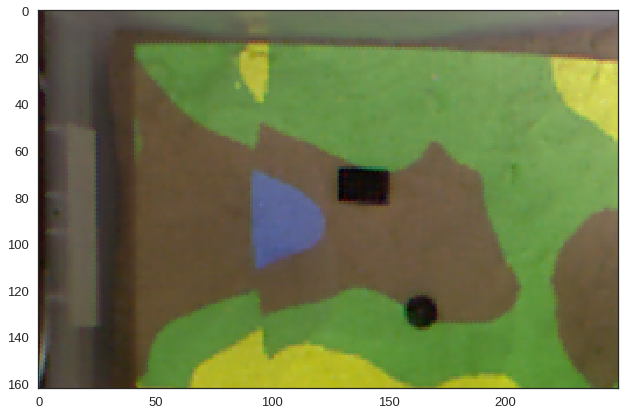

In [12]:
plt.imshow(kinect.calibrate_frame(photo), cmap='viridis')


## Image recognition

In [13]:
import gempy.hackathon as hk

In [14]:
cal_photo = kinect.calibrate_frame(photo)

using last calibration instance created.


In [15]:
source = hk.where_circles(cal_photo)

In [16]:
hk.where_non_circles(cal_photo)

[[164, 125], [133, 109], [138, 75], [17, 88], [66, 74]]

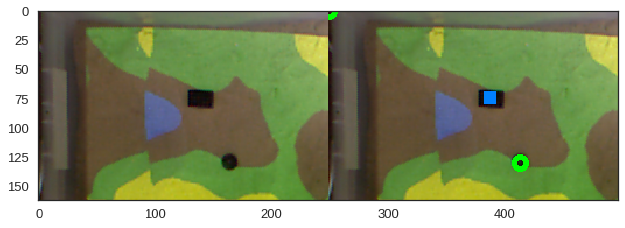

In [17]:
hk.plot_all_shapes(cal_photo, thresh_value=60)

## Seismic forward modelling XY

In [18]:
model.calculate_scales()
model.

Aspect ratio of the model is fixed in XY
Model size is limited by Y dimension
scale in Model units/ mm (X,Y,Z): [12.345679012345679, 12.345679012345679, 5.0]


using last calibration instance created.


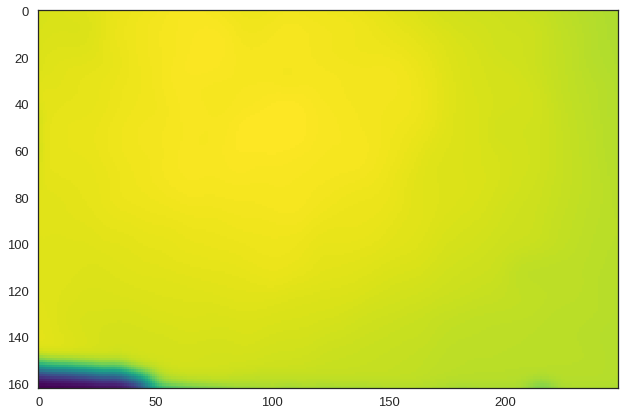

In [39]:
topo_map = kinect.calibrate_frame(kinect.depth)
plt.imshow(topo_map, cmap='viridis')

In [2]:
#np.save('topo_map', topo_map)
#np.save('sources', source)
import numpy as np
import gempy.hackathon as hk

In [ ]:
kin

In [18]:
np.array(source)

array([[186, 114],
       [174,  94],
       [327, 225]])

In [4]:
seism = hk.simulate_seismic_topo(topo_map, source, None)


CustomCompiler: compiled /tmp/devito-9v758b7o/cd866d7b9972c9309c73f6a1dfb51fb39e654285.c [0.28 s]
Section section_1<1190,1> with OI=0.84 computed in 0.000 s [160.65 GFlops/s]
Section section_2<1190,1,1> with OI=0.84 computed in 0.000 s [160.65 GFlops/s]
Section section_3<1190,1,1> with OI=0.84 computed in 0.002 s [0.10 GFlops/s]
Section main<1190,241,328> with OI=3.29 computed in 0.206 s [24.24 GFlops/s, 0.46 GPts/s]


In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [13]:
def plot(slice_):
    plt.imshow(seism[slice_,:, :])
interact(plot, slice_=500)

interactive(children=(IntSlider(value=500, description='slice_', max=1500, min=-500), Output()), _dom_classes=('widget-interact',))

<function __main__.plot>

## Seismic for geology